# Loan Prediction Dataset

Table of Contents:

0. Problem Statement
1. Data Analysis
    - Data Description
    - Data Loading and Cleanup
    - Exploratory Data Analysis (EDA)
        - Distribution Plots
        - Outlier Removal
        - Box Plots
        - Count Plots
        - Correlation Heatmap
2. Machine Learning Models
    - Data Preprocessing
    - Model Selection
    - Model Evaluation
3. Conclusions

## Problem Statement

**Problem:** This year, a bank is seeking to issue new loans to their customers. However, the number of applicants is such that it has become practically impossible to examine all loan applications individiually and on time. 

**Objective:** Given past loan approval data, help automatize the loan approval process so that the bank team does not get overwhelmed.

**Solution:** Build a Machine Learning Classification Model that will be trained on past, manually conducted loan approval data and be able to estimate the probability of an applicant being a suitable borrower of the bank's funds.

## 1. Data Analysis

### Data Description

*Dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset*

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

The dataset includes 4269 rows and 13 columns:
- `loan_id` (number)
- `no_of_dependents` (number of dependets of the applicant; number)
- `education` (education of the applicant; Graduate/Non Graduate)
- `self_employed` (yes/no)
- `income_annum` (annual income of applicant; number)
- `loan_amount` (number)
- `loan_term` (years)
- `cibil_score` (CIBIL credit score; number from 300 to 900)
- `residential_assets_value` (number)
- `commercial_assets_value` (number)
- `luxury_assets_value` (number)
- `bank_asset_value` (number)
- `loan_status` (Approved/Rejected)

### Data Loading and Cleanup

In [122]:
#Importing libraries
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from scipy.stats import skew, f_oneway, ttest_1samp

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [123]:
#Loading Data
df = pd.read_csv('loan_approval_dataset.csv')

In [124]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [125]:
#Setting index
df = df.set_index('loan_id')

In [126]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Every column name has a blank space before it. Let's clean that up.

In [127]:
#Removing whitespaces from column names
def rename_dataframe(df):
    for col in df.columns:
        df.rename(columns={ f'{col}' : f'{col.strip(' ')}'}, inplace=True)
    return df

In [128]:
df = rename_dataframe(df)
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [129]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


Not only are the column names infected with the 'leading whitespace', but so is every single string object inside of the dataset. This also requires cleaning.

In [132]:
#Automatically detecting which columns are of the string type by going through the first row
def declare_cat_num_cols(df):
    categorical_cols = []
    numerical_cols = []
    for i, col in enumerate(df.columns):
        if is_numeric_dtype(df.iloc[0,i])==False:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    return categorical_cols, numerical_cols

In [133]:
categorical_cols, numerical_cols = declare_cat_num_cols(df)

In [134]:
#Removing leading whitespaces from categorical data
def remove_leading_whitespaces(df, categorical_cols):
    for i, col in enumerate(df[categorical_cols].columns):
        df[col] = df[col].apply(lambda string: string.strip())
    return df

In [135]:
df = remove_leading_whitespaces(df, categorical_cols)

Checking if the column names are now fixed:

In [ ]:
df.iloc[0,1]

'Graduate'

In [138]:
df.iloc[0,2]

'No'

In [139]:
df.iloc[0,-1]

'Approved'

Success!

In [151]:
#Checking for null-values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [153]:
#Checking for duplicates
df.duplicated().sum()

0

In [154]:
#Checking y-target balance of our dataset
print(f'Number of approved loans: {df[df['loan_status']=='Approved'].value_counts().sum()}')
print(f'Number of rejected loans: {df[df['loan_status']=='Rejected'].value_counts().sum()}')

Number of approved loans: 2656
Number of rejected loans: 1613


We see that there is around 1.5x more positive target values than there is negative ones. This will be taken into account when training our model.

In [185]:
#Descriptive Statistics to spot any errors in data
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


The above table shows that the minimum `residential_assets_value` is a negative number. At first sight, this might seem like an error. However, the value of a residential asset can indeed be negative if the current value of the property is lower than the mortgage value. Just in case, let us plot the negative `residential_assets_value` column values.

<Axes: xlabel='loan_id', ylabel='residential_assets_value'>

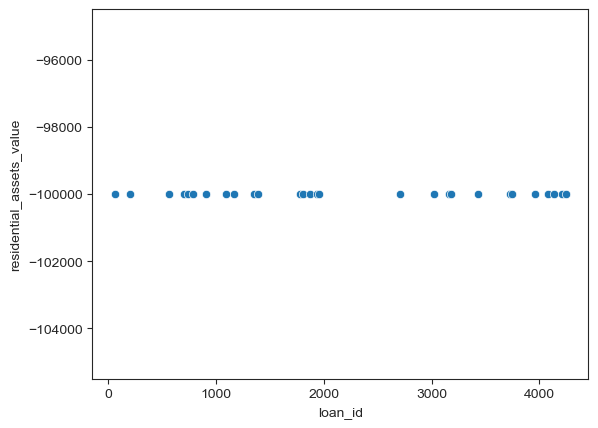

In [191]:
sns.scatterplot(data=df[df['residential_assets_value']<0], x=df[df['residential_assets_value']<0].index, y=df[df['residential_assets_value']<0]['residential_assets_value'])

In [194]:
#Number of negative residential asset values
df[df['residential_assets_value']<0].value_counts().sum()

28

Even though this value could theoretically be negative, because of the odd uniformity of negative value in this category, we will assume that these 28 data points are indeed erronous and will remove them.

In [196]:
len(df)

4269

In [200]:
df = df.query('residential_assets_value >= 0')

In [201]:
len(df)

4241

### Exploratory Data Analysis

### Distribution Plots

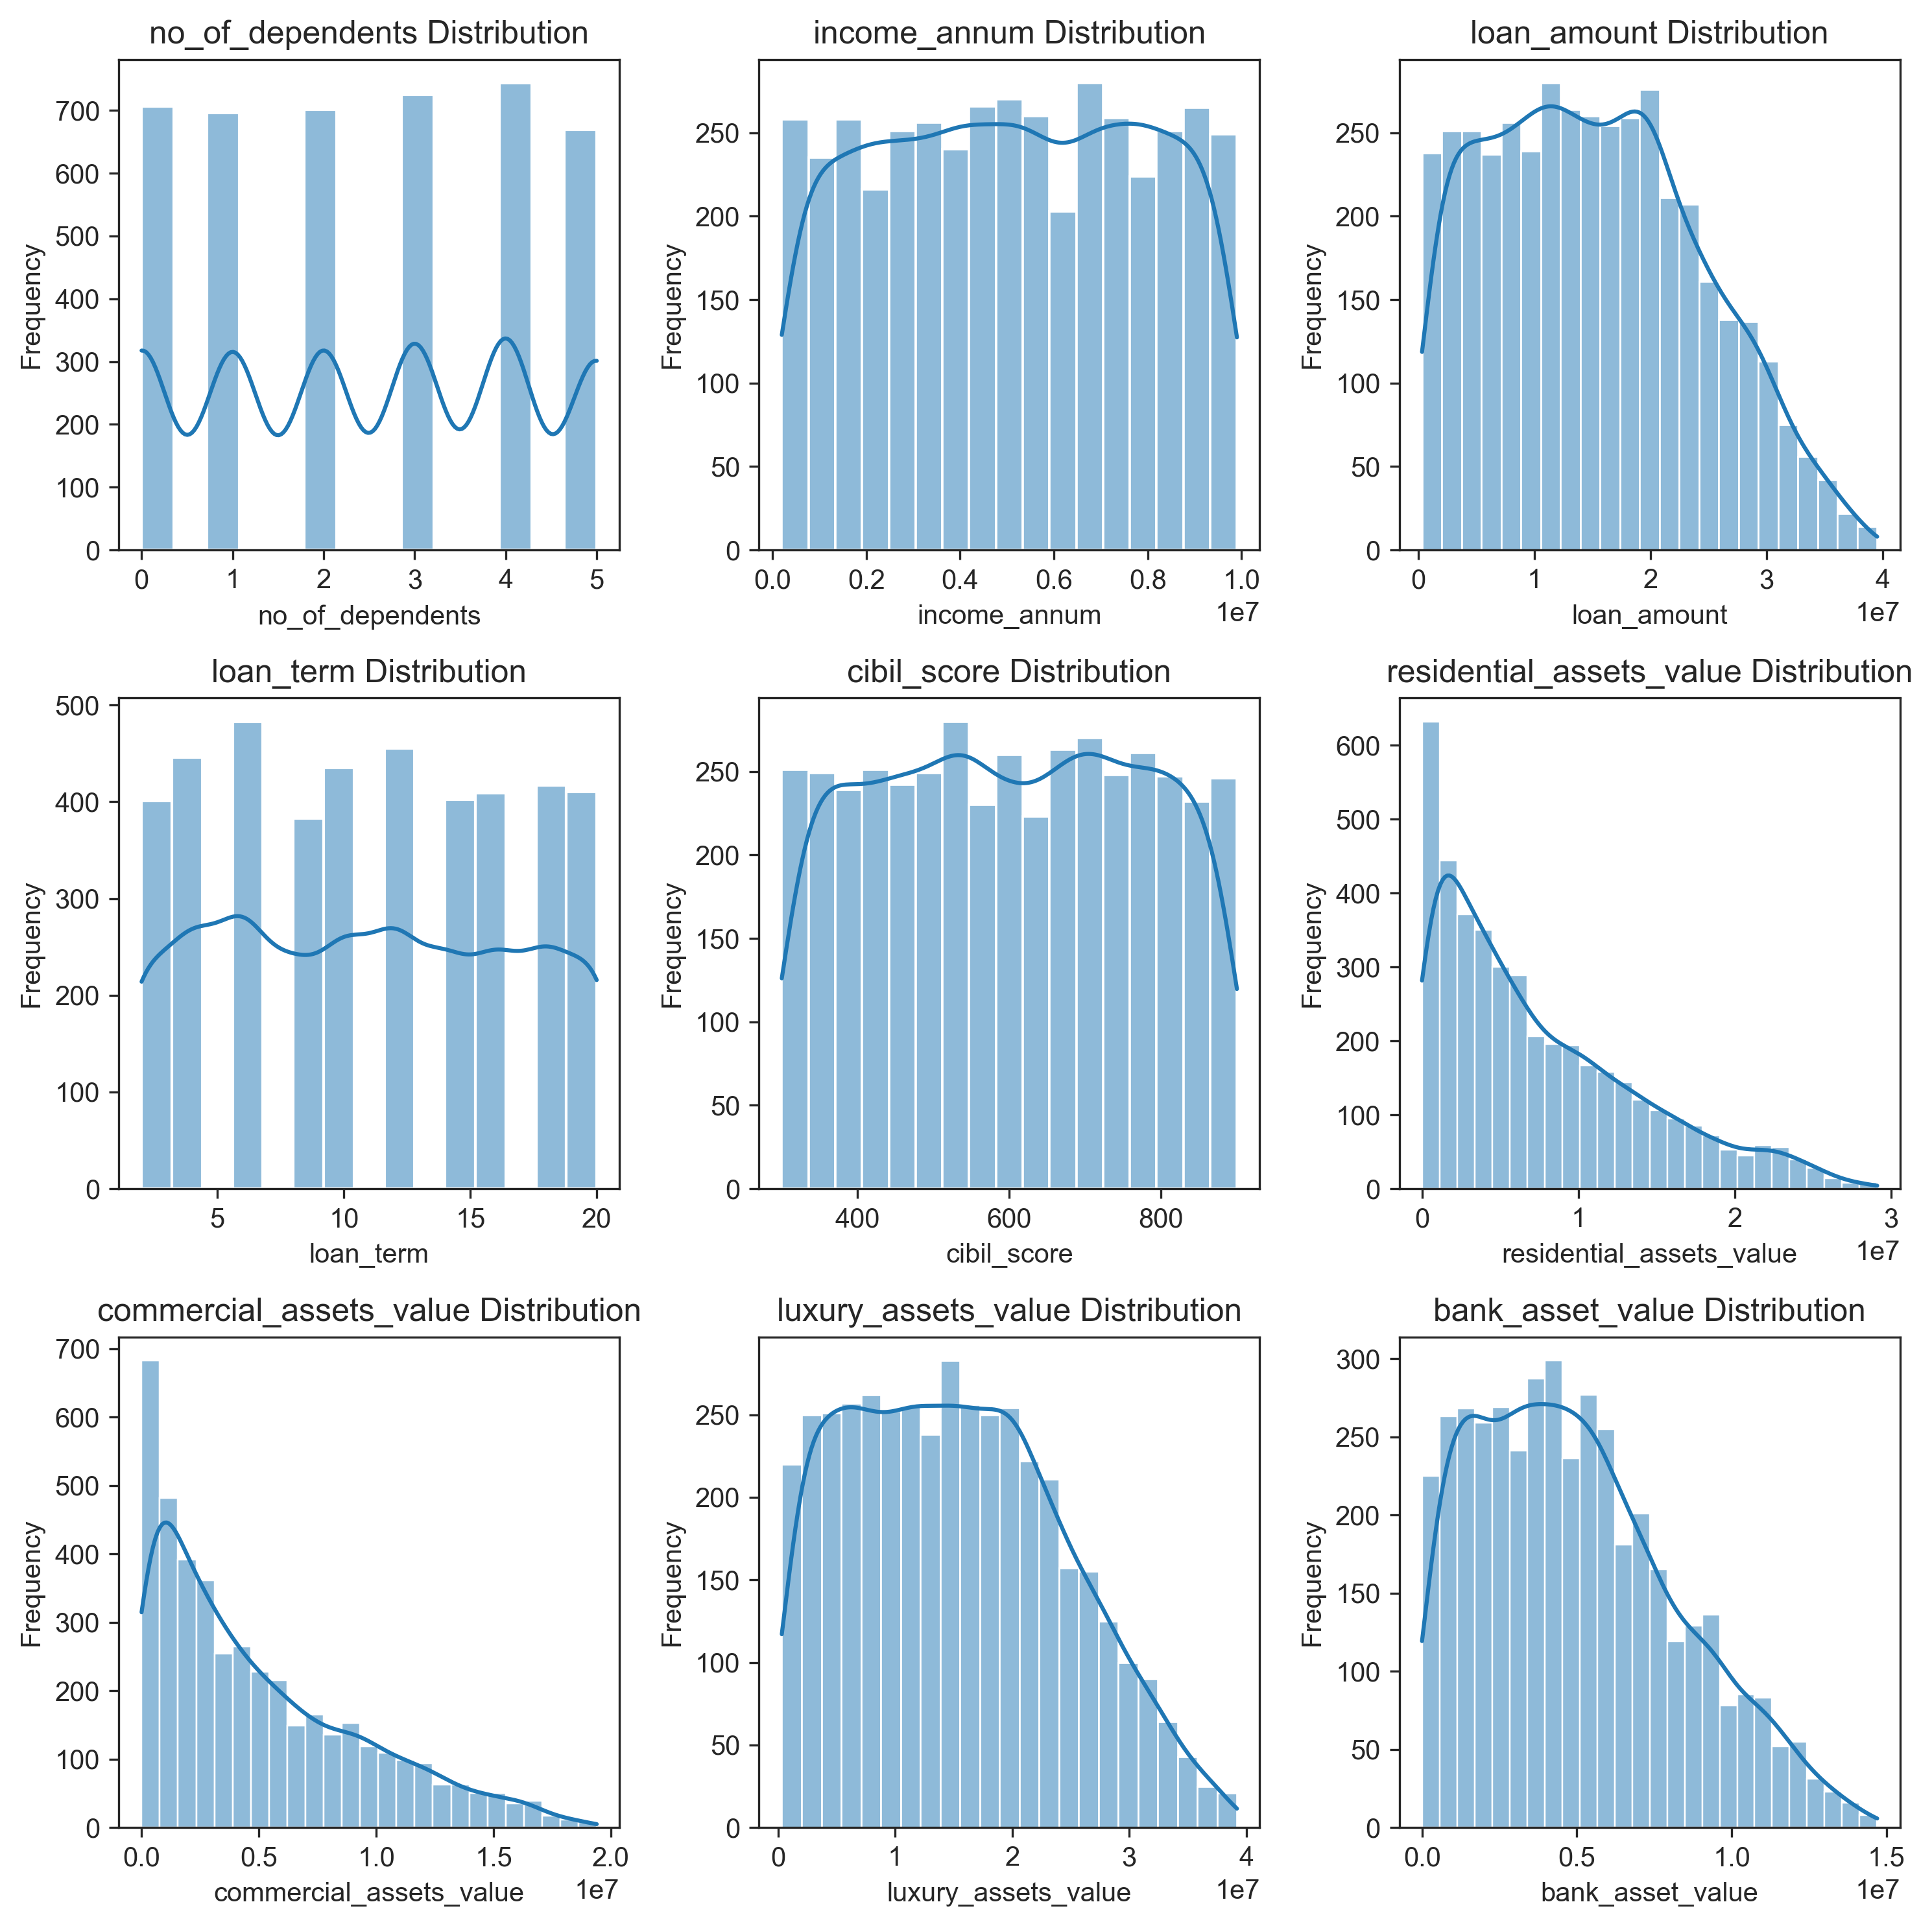

In [202]:
#Distribution plots for numerical features
fig= plt.figure(figsize=(10,10), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(df[col], kde=True)
    plt.ylabel("Frequency")
    plt.title(f'{col} Distribution')

plt.savefig('images/01_Distributions.png', bbox_inches='tight')
plt.tight_layout()
plt.show()